#### Importing Numpy and pyplot from matplotlib

In [6]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.animation as animation

### Creating array

In [7]:
# Created 20 x 20 board
board = np.zeros((20, 20), dtype=int)
board.put([23, 44, 62, 63, 64], 1)

#### Checking validity

In [8]:
def is_valid_board(board):
    return (
        isinstance(board, np.ndarray) and
        board.ndim == 2 and
        np.issubdtype(board.dtype, np.integer) and
        np.all(np.isin(board, [0, 1]))
    )

print(is_valid_board(board))

True


#### Creating next of the game

In [9]:
def gol_step(board):
  if not is_valid_board(board):
    raise ValueError("Invalid board")
  
  new_board = np.zeros((20, 20), dtype=int)
  
  for row in range(20):
    for column in range(20):
        live_neighbors = sum(board[(row + di) % 20, (column + dj) % 20] 
                              for di in [-1, 0, 1] 
                              for dj in [-1, 0, 1] 
                              if not (di == 0 and dj == 0)
                            )

        # Apply the rules of the Game of Life
        if board[row, column]:  # Current cell is alive
          if live_neighbors in [2, 3]:
            new_board[row, column] = 1  # Stay alive
        else:  # Current cell is dead
          if live_neighbors == 3:
            new_board[row, column] = 1  # Become alive
  return new_board

new_board = gol_step(board)

#### Ploting the instance of the game

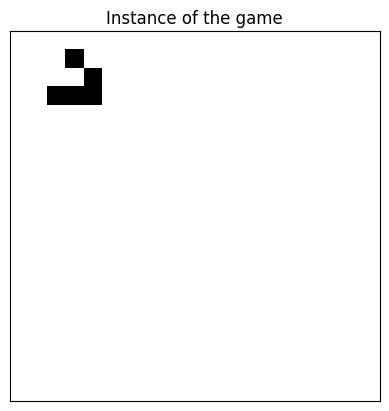

In [10]:
def draw_gol_board(board):
  plt.xticks([])
  plt.yticks([])
  plt.imshow(board, cmap='Greys')
  plt.title("Instance of the game")
  plt.savefig('glider_board.png', bbox_inches='tight', pad_inches=0.1)
  plt.show()

draw_gol_board(board)

#### Creating subplots

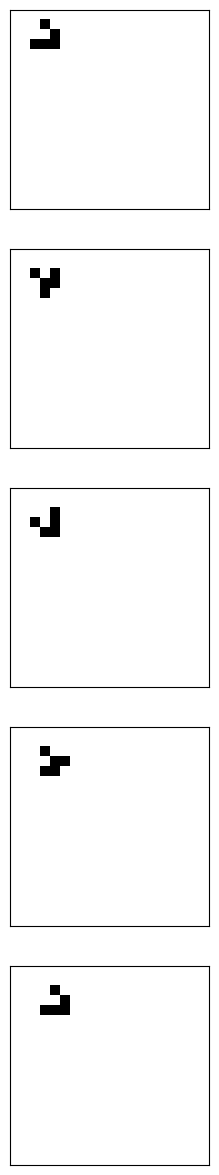

In [11]:
fig, axs = plt.subplots(5, 1, figsize=(5, 15))

for i in range(5):
  axs[i].imshow(board, cmap='gray_r', interpolation='nearest')
  axs[i].set_xticks([])
  axs[i].set_yticks([])
  board = gol_step(board)

plt.savefig('glider_5steps.png')
plt.show()

#### Creating animation

Initial Board:
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]
Step 1:
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 

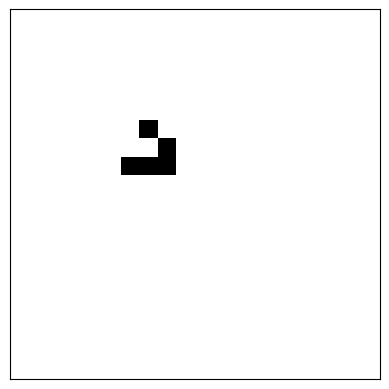

In [12]:
def animate_game(board, steps):
  fig, ax = plt.subplots()
  mat = ax.matshow(board, cmap='gray_r')
  plt.xticks([])
  plt.yticks([])

  def update(current_board):
    mat.set_data(current_board)
    return mat

  def data_gen():
    current_board = board
    for step in range(steps):
      print(f"Step {step + 1}:\n{current_board}\n")
      current_board = gol_step(current_board)
      yield current_board

  ani = animation.FuncAnimation(fig, update, data_gen, interval=200, 
                                save_count=steps, cache_frame_data=False)
  
  ani.save('game_of_life.gif', writer='pillow')
  plt.show()

board = np.zeros((20, 20), dtype=int)

board[1, 2] = 1
board[2, 3] = 1
board[3, 1:4] = 1

print("Initial Board:")
print(board)

animate_game(board, 20)